# **Multiple Linear Regression**
- Multiple Linear Regression is an extension of Simple Linear Regression that allows us to model the relationship between multiple independent variables (features) and a single dependent variable (target). 
- It assumes a linear relationship between the dependent variable Y and multiple independent variables X1, X2, X3...

The multiple linear regression equation is:

**Y = β0 + β1X1 + β2X2 + … + βnXn + ε**

Where:
  - Y is the dependent variable
  - X1, X2, …, Xn are the independent variables
  - β0 is the intercept or constant term
  - β1, β2, …, βn are the coefficients or slopes of the independent variables
  - ε is the error term


-Assumptions:
  - Linearity: The relationship between each independent variable and the dependent variable should be linear.
  - Independence: Each observation should be independent of the others.
  - Homoscedasticity: The variance of the error term should be constant across all levels of the independent variables.
  - Normality: The error term should be normally distributed.
  - No multicollinearity: The independent variables should not be highly correlated with each other.
  
  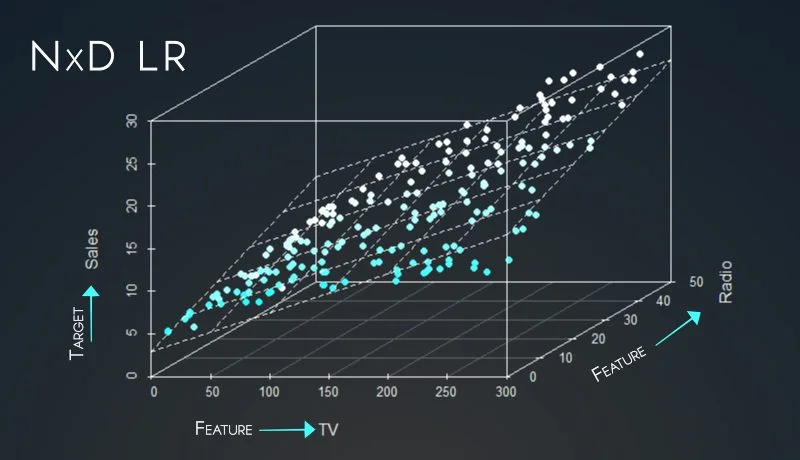

## Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# **Multiple Linear Regression using sklearn - LinearRegression**

Hyperparameters -

- fit_intercept : If set to False, no intercept will be used in calculations
- n_jobs : no. of CPU cores
- copy_X : If True, X will be copied; else, it may be overwritten.
- positive : When set to True, forces the coefficients to be positive. This option is only supported for dense arrays.

## Loading Dataset

In [2]:
dataset = load_diabetes(as_frame = True)
df = dataset['data']
df['target'] = dataset['target']

In [3]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


## Checking for NaN Values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


## 3D Plot using columns - age, s5 and target

In [5]:
# Plotly plot
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter3d(
    x=df['age'],
    y=df['s5'],
    z=df['target'],
    mode='markers',
    marker=dict(size=3)
))
fig.update_layout(
    title = "3D Plot using columns - age, s5 and target",
    width = 500,
    height = 500
)
fig.show()

## Train Test Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, ['age', 's5']], df.iloc[:, -1], test_size = 0.2, random_state =42)

## Model Training and Testing

In [7]:
mlr = LinearRegression(fit_intercept = True, n_jobs = 5, positive = False, copy_X = False)

In [8]:
mlr.fit(X_train, y_train)

LinearRegression(copy_X=False, n_jobs=5)

## Weight and Bias

In [9]:
print(mlr.coef_, mlr.intercept_, sep = '\n')

[ 87.67731153 878.43508366]
152.54190100904083


## Model Prediction and r2_score

In [10]:
y_pred = mlr.predict(X_test)

In [11]:
r2_score(y_test, y_pred)

0.3771629555077921

## Plotting Best Fit Plane

In [12]:
x, y = df['age'], df['s5']

x_input = np.linspace(x.min(), x.max(), 21)
y_input = np.linspace(y.min(), y.max(), 21)
xGrid, yGrid = np.meshgrid(x_input,y_input)

final = pd.DataFrame(np.vstack((xGrid.ravel().reshape(1,441),yGrid.ravel().reshape(1,441))).T)
# print(final)
final.rename(columns = {0: 'age', 1: 's5'}, inplace = True)
z_final = mlr.predict(final).reshape(21, 21)
fig = go.Figure()
fig.add_trace(go.Scatter3d(
    x=x,
    y=y,
    z=df['target'],
    mode='markers',
    marker=dict(size=3)
))
fig.add_trace(go.Surface(x = x_input, y = y_input, z = z_final))
fig.update_layout(
    title = "Best Fit Hyperplane",
    width = 500,
    height = 500
)
fig.show()

# **Creating Multiple Regression Class**

Using Ordinary Least Square Estimator 
- betas = np.linalg.inv(np.dot(X_train.T, X_train)).dot(X_train.T).dot(y_train)

In [13]:
class multiple_linear_regression:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None
    
    def fit(self, X_train, y_train):
        betas = np.linalg.inv(np.dot(X_train.T, X_train)).dot(X_train.T).dot(y_train)
        self.intercept_ = betas[0] # 1st value beta°
        self.coef_ = betas[1:] # From 2nd value beta1, beta2 as all

    def predict(self, X_test):
        y_pred = self.intercept_ + np.dot(X_test, self.coef_)
        return y_pred

In [14]:
# Creating object
mlr = multiple_linear_regression()

## Y_hat  = X * betas 
In the 1st column all are beta°(i.e. intercept), so when you seperate all the betas the 1st column remains 1 thats why inserting 1 as a first column

In [15]:
temp_X_train = X_train.copy()
temp_X_train.insert(loc = 0, column = 'intercept_', value=np.ones(X_train.shape[0]))

In [16]:
mlr.fit(temp_X_train, y_train)

## Weights and Bias

In [17]:
mlr.coef_

array([ 87.67731153, 878.43508366])

In [18]:
mlr.intercept_

153.73654390934837

## Model Prediction and r2_score

In [19]:
y_pred = mlr.predict(X_test)

In [20]:
r2_score(y_test, y_pred)

0.3759788819194757

## Plotting Best Fit Plane

In [21]:
x, y = df['age'], df['s5']

x_input = np.linspace(x.min(), x.max(), 21)
y_input = np.linspace(y.min(), y.max(), 21)
xGrid, yGrid = np.meshgrid(x_input,y_input)

final = pd.DataFrame(np.vstack((xGrid.ravel().reshape(1,441),yGrid.ravel().reshape(1,441))).T)
final.rename(columns = {0: 'age', 1: 's5'}, inplace = True)
z_final = mlr.predict(final).reshape(21, 21)

fig = go.Figure()
fig.add_trace(go.Scatter3d(
    x=x,
    y=y,
    z=df['target'],
    mode='markers',
    marker=dict(size=3)
))
fig.add_trace(go.Surface(x = x_input, y = y_input, z = z_final))
fig.update_layout(
    title = "Best Fit Hyperplane",
    width = 500,
    height = 500
)
fig.show()

# **Multiple Linear Regression using Gradient Descent**
## θt+1 = θt - η * ∇J(θt)
- Cost Function: The cost function is a measure of the difference between the predicted output and the actual output. In the case of linear regression, the cost function is the mean squared error (MSE). (Formula : -2 * np.dot(y_train - y_hat, X_train))

- Gradient: The gradient is a vector that points in the direction of the steepest increase of the cost function at a specific point. In gradient descent, we move in the opposite direction of the gradient to update the model parameters.
(Formula : self.intercept_ + np.dot(X_train, self.coef_))
- Learning Rate: The learning rate (η) controls the step size of each update. A large learning rate can lead to overshooting, while a small learning rate can lead to slow convergence.

Learning Rate and No. of Epochs are Hyperparameters of Gradient Descent

My GD Notebook - https://www.kaggle.com/code/shriramvibhute/gradient-descent-batch-stochastic-mini-batch

In [22]:
class GDRegressor:
    def __init__(self, lr, epochs) -> None:
        self.coef_ = None
        self.intercept_ = None
        self.lr = lr
        self.epochs = epochs
    
    def fit(self, X_train, y_train) -> None:
        # Generally the random values of coefs and intercept
        self.coef_ = np.ones(X_train.shape[1])
        self.intercept_ = 0

        for i in range(self.epochs):
            y_hat = self.intercept_ + np.dot(X_train, self.coef_)

            # Calculating the accurate value of intercept
            intercept_der = -2 * np.mean(y_train - y_hat)
            self.intercept_ = self.intercept_ - (self.lr * intercept_der)

            # Calculating the accurate value of coeffs_
            coef_der = -2 * np.dot(y_train - y_hat, X_train)
            self.coef_ = self.coef_ - (self.lr * coef_der)
    
    def predict(self, X_test):
        return self.intercept_ + np.dot(X_test, self.coef_)

In [23]:
gdr = GDRegressor(0.01, 350)

In [24]:
gdr.fit(X_train, y_train)

## Weights and Bias

In [25]:
print(gdr.coef_, gdr.intercept_, sep = '\n')

[ 94.2701269 871.7132625]
153.6059558084808


## Model Prediction and r2_score

In [26]:
y_pred = gdr.predict(X_test)

In [27]:
r2_score(y_test, y_pred)

0.37511190507751213